In [1]:
import pandas as pd
path = '../data/corpus.tsv'
raw_corpus = pd.read_csv(path, names=['text'], sep='\t')
raw_corpus

,text
0,松田 三徳（まつだ みのり、1886年（明治19年）6月11日 - 1962年（昭和37年）...
1,衆議院議員
2,旧姓・小島
3,経歴.
4,香川県三野郡、のちの三豊郡詫間村（詫間町を経て現三豊市詫間町）で小島家に生まれ、1897年（...
...,...
542705,編集は主に立志社が当たり、大阪市で刊行された
542706,1880年（明治13年）3月に第一編を発行、同年8月からは『愛国新誌』と改題し、1881年（...
542707,発行スタイルは当初は週刊誌、1881年1月の第20号からは月3回刊行に変更された
542708,植木枝盛を、永田一二や坂本南海男、などの自由民権運動家が執筆・編集にあたり、人民主権などの自...


In [2]:
import MeCab
mecab = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [3]:
from word import Feature, Word

def spell(word: Word) -> str:
    if len(word.feature) < 8:
        return ''
    return word.feature[Feature.SPELL]

def words(text: str) -> list[Word]:
    # `[:-2]`で末尾2つの`['EOF', '']`を削除しています
    return map(Word, mecab.parse(text).split('\n')[:-2])

In [4]:
import re

corpus = list(raw_corpus['text'])
corpus = map(lambda text: words(text), corpus)
corpus = map(lambda words: map(spell, words), corpus)
corpus = map(lambda spells: ''.join(spells), corpus)
corpus = map(lambda text: re.sub('[ヰヱ]|[^ァ-ンー]', '', text), corpus)
corpus = map(lambda text: ' '.join(text), corpus)
corpus = list(corpus)
corpus

['マ ツ ダ ミ ツ ノ リ マ ツ ダ ミ ノ リ セ ン ハ ッ ピ ャ ク ハ チ ジ ュ ウ ロ ク ネ ン メ イ ジ ジ ュ ウ ク ネ ン ロ ク ガ ツ ジ ュ ウ イ チ ニ チ セ ン キ ュ ウ ヒ ャ ク ロ ク ジ ュ ウ ニ ネ ン シ ョ ウ ワ サ ン ジ ュ ウ シ チ ネ ン ジ ュ ウ ニ ガ ツ ジ ュ ウ キ ュ ウ ニ チ ハ メ イ ジ マ ツ カ ラ シ ョ ウ ワ キ ノ ジ ツ ギ ョ ウ カ セ イ ジ カ',
 'シ ュ ウ ギ イ ン ギ イ ン',
 'キ ュ ウ セ イ コ ジ マ',
 'ケ イ レ キ',
 'カ ガ ワ ケ ン ミ ノ グ ン ノ チ ノ ミ ト ヨ グ ン タ ク マ ム ラ タ ク マ チ ョ ウ ヲ ヘ テ ゲ ン ミ ト ヨ シ タ ク マ チ ョ ウ デ コ ジ マ カ ニ ウ マ レ セ ン ハ ッ ピ ャ ク キ ュ ウ ジ ュ ウ ナ ナ ネ メ イ ジ サ ン ジ ュ ウ ネ ン マ ツ ダ カ ン ゴ ノ ヨ ウ シ ト ナ リ カ ト ク ヲ ソ ウ ゾ ク シ タ',
 'セ ン キ ュ ウ ヒ ャ ク キ ュ ウ ネ ン メ イ ジ ヨ ン ジ ュ ウ ニ ネ ン ケ イ オ ウ ギ ジ ュ ク ダ イ ガ ク ホ ウ リ ツ カ ヲ ソ ツ ギ ョ ウ シ タ',
 'イ チ ネ ン シ ガ ン ヘ イ ト シ テ ニ ュ ウ タ イ シ リ ク グ ン サ ン ト ウ シ ュ ケ イ ニ ニ ン カ ン シ ジ ョ タ イ シ タ',
 'タ イ ワ ン ソ ウ ト ク フ ヒ シ ョ カ ン ド ウ カ ン ボ ウ ヒ シ ョ カ チ ョ ウ ヲ ツ ト メ タ',
 'キ キ ョ ウ シ テ ノ ウ ギ ョ ウ シ オ ギ ョ ウ ヲ イ ト ナ ム',
 'サ ヌ キ サ ン ギ ョ ウ ト リ シ マ リ ヤ ク サ ヌ キ ベ イ コ エ シ ャ チ ョ ウ ニ ッ ポ ン ト リ シ マ リ ヤ ク ナ ド ヲ ツ ト メ タ',
 'セ イ カ イ デ ハ カ ガ ワ ケ ン カ イ ギ イ ン シ ョ ト ク ゼ イ チ ョ ウ サ イ イ ン ソ ウ ゾ ク ゼ イ チ ョ ウ サ イ イ ン カ ン ユ ウ ザ イ サ ン チ ョ 

In [5]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, min_count=1, vector_size=8)
model

In [6]:
len(model.wv.vectors)

83

In [7]:
from sklearn.decomposition import PCA

mini_model = [model.wv.vectors[index] for key, index in model.wv.key_to_index.items()]

pca = PCA(n_components=3)
model_3d = pca.fit_transform(mini_model)

In [8]:
import matplotlib
from matplotlib.font_manager import FontProperties

font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams["font.family"] = font_prop.get_name()

In [9]:
import matplotlib.pyplot as plt

def render_frame_2d():
    pca_2d = PCA(n_components=2)
    model_2d = pca_2d.fit_transform(mini_model)
    fig = plt.figure(figsize=[10., 10.])
    ax = fig.gca()
    ax.set_aspect('auto', adjustable='box')
    for key, index in model.wv.key_to_index.items():
        ax.plot(model_2d[index][0], model_2d[index][1], marker='.')
        ax.text(model_2d[index][0], model_2d[index][1], key)

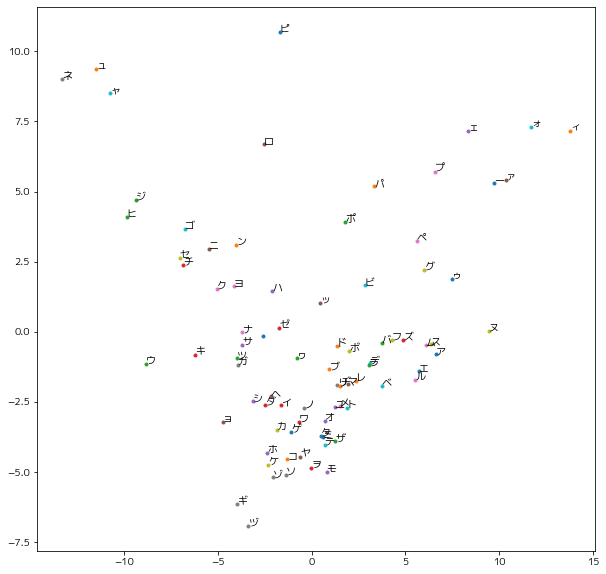

In [10]:
render_frame_2d()

In [11]:
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def render_frame(angle):
    fig = plt.figure(figsize=[10., 10.])
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)
    ax.set_aspect('auto', adjustable='box')
    for key, index in model.wv.key_to_index.items():
        ax.plot(model_3d[index][0], model_3d[index][1], model_3d[index][2], marker='.')
        ax.text(model_3d[index][0], model_3d[index][1], model_3d[index][2], key)
    plt.close()
    buf = BytesIO()
    fig.savefig(buf, bbox_inches='tight', pad_inches=0.0)
    return Image.open(buf)

In [12]:
images = [render_frame(angle) for angle in range(0, 360, 2)]
images[0].save('../output.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

/tmp/ipykernel_3412/3853959611.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [13]:
def to_json_object(item):
    key, index = item
    return f'{{"kana": "{key}", "vector": {list(model.wv.vectors[index])}}}'

def to_json(model):
    items = model.wv.key_to_index.items()
    items = sorted(items)
    return ', '.join(map(to_json_object, items))

In [14]:
print(to_json(model))

{"kana": " ", "vector": [0.49792603, 0.20164958, 0.1452933, -0.52332395, -1.4307473, -0.9429194, 1.7426976, 0.27152348]}, {"kana": "ァ", "vector": [0.39470068, 2.4536824, -6.8454947, 7.092444, 7.7401085, -2.0922825, 1.8160442, -6.347596]}, {"kana": "ア", "vector": [-1.1422317, 1.4477898, -0.90570897, 2.244636, 6.841536, 0.0038509693, -2.7593884, -0.99533945]}, {"kana": "ィ", "vector": [0.34517092, 1.6275854, -5.972481, 3.2693157, 14.165805, -4.147208, 4.1812444, -5.5930724]}, {"kana": "イ", "vector": [-0.5603801, 3.117819, -0.94477403, -1.6296015, -1.7500219, 0.08167377, 1.3349524, -1.3617772]}, {"kana": "ゥ", "vector": [0.06641458, 2.0037344, -0.73597026, 2.959581, 8.243428, -1.7542841, -0.8516313, -1.9479388]}, {"kana": "ウ", "vector": [0.32710847, 0.73640853, 2.7029324, -2.6988018, -6.338923, -1.8848721, 3.8836944, 2.3223455]}, {"kana": "ェ", "vector": [1.8024111, -0.16432136, -2.7790678, 8.010002, 8.232279, -2.60544, 1.0978721, -3.4363403]}, {"kana": "エ", "vector": [-2.5500202, 0.80769217

In [15]:
model.save('../data/kana.model')